Bayesian Regression
-----

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Abalone_at_California_Academy_of_Sciences.JPG/1200px-Abalone_at_California_Academy_of_Sciences.JPG" width="500"/></center>

You are hired by a humble abalone farmer. She is interested in conducting analysis to help her understand her beloved molluscs.

----
Data
----

Lucky for both of you there is historical data:

http://archive.ics.uci.edu/ml/datasets/Abalone?pagewanted=all

In [159]:
reset -fs

In [160]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [161]:
# Load data 
abalone = pd.read_csv('../data/abalone.csv')
abalone.head(n=1)

,sex,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15


__Part 1__:

Explore the linear length and diameter. Length is far easier to measure but diameter is more related about of meat for sale.

__TODO__: Plot the relationship:

<br>
<details><summary>
Click here for a hint…
</summary>
Create a new DataFrame with generic names 'x' and 'y' for MCMC plotting
</details>

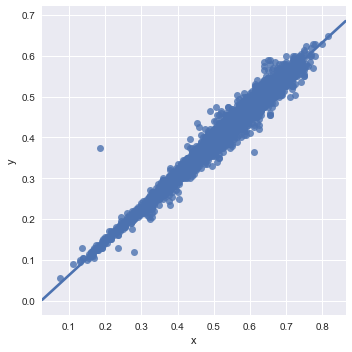

In [162]:
# Solution
df = pd.DataFrame(dict(x=abalone.length, y=abalone.diameter))
sns.lmplot(x='x', y='y', data=df);

__TODO__: Fit MCMC

<br>
<details><summary>
Click here for a hint…
</summary>
https://pymc-devs.github.io/pymc3/notebooks/GLM-robust.html
</details>

In [163]:
import pymc3 as pm

In [164]:
basic_model = # TODO: Create instance of model class
with basic_model:

    pm.glm.glm("None", # TODO: Define glm using the R / Patsy model syntax
               df, 
               family=pm.glm.families.Normal()) # Normal distribution for the likelihood

    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pm.find_MAP()

    # Use the No-U-Turn Sampler
    step = pm.NUTS()

    # Calculate the trace
    iterations = 5000
    trace = pm.sample(iterations, 
                    step, 
                    start,  
                    progressbar=True)

SyntaxError: invalid syntax (<ipython-input-164-d681d79c2bc7>, line 1)

In [ ]:
# Solution
# Use PyMC3 to construct a model context
basic_model = pm.Model()
with basic_model:

    pm.glm.glm("y ~ x", # Define glm using the R / Patsy model syntax
               df, 
               family=pm.glm.families.Normal()) # Normal distribution for the likelihood

    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pm.find_MAP()

    # Use the No-U-Turn Sampler
    step = pm.NUTS()

    # Calculate the trace
    iterations = 5000
    trace = pm.sample(iterations, 
                    step, 
                    start,  
                    progressbar=True)

-----

__TODO__: Plot the bayesian regression:

In [ ]:
# Solution:
# Plot a sample of posterior regression lines
# sns.lmplot(x="length", y="diameter", data=abalone, fit_reg=True);
sns.lmplot(x="weight_shucked", y="shell", data=abalone, fit_reg=False);
pm.glm.plot_posterior_predictive(trace,
                                samples=50,
                                label='posterior predictive regression lines')
plt.legend(loc=0);

----
Part 2: Repeat with weight_shucked and shell (weight)
    -----

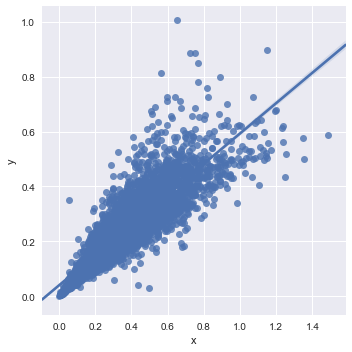

In [165]:
#     weight_shucked and shell # linear relationship with high noise

df = pd.DataFrame(dict(x=abalone.weight_shucked, y=abalone.shell))
sns.lmplot(x='x', y='y', data=df);

In [166]:
# Use PyMC3 to construct a model context
basic_model = pm.Model()
with basic_model:

    pm.glm.glm("y ~ x", # Define glm using the R / Patsy model syntax
               df, 
               family=pm.glm.families.Normal()) # Normal distribution for the likelihood

    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pm.find_MAP()

    # Use the No-U-Turn Sampler
    step = pm.NUTS()

    # Calculate the trace
    iterations = 5000
    trace = pm.sample(iterations, 
                    step, 
                    start,  
                    progressbar=True)

Optimization terminated successfully.
         Current function value: -5427.860086


100%|██████████| 5000/5000 [00:18<00:00, 273.77it/s]

         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18


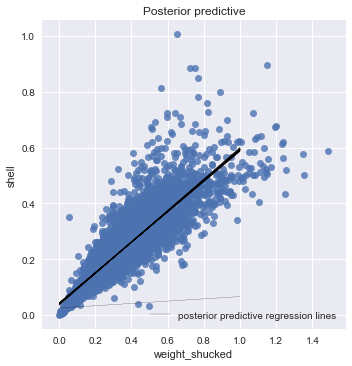

In [167]:
# Plot a sample of posterior regression lines
# sns.lmplot(x="length", y="diameter", data=abalone, fit_reg=True);
sns.lmplot(x="weight_shucked", y="shell", data=abalone, fit_reg=False);
pm.glm.plot_posterior_predictive(trace,
                                samples=50,
                                label='posterior predictive regression lines')
plt.legend(loc=0);

<br>
<br> 
<br>

----